# IRIS - Connection II
---
![Add layer](https://github.com/DrKAI/image/blob/main/Add%20Layer.png?raw=true)

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import load_iris

## 데이터 불러오기
* iris.feature_names를 이용하여 판다스 데이터 프레임 만들기!

In [2]:
iris = load_iris()

df_x = pd.DataFrame(iris.data, columns = iris.feature_names)
y = iris.target

In [3]:
df_x.shape, y.shape

((150, 4), (150,))

In [4]:
df_x.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [5]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


## train set, test set 구분하기

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_x, y, test_size=0.15, random_state= 2023)

## **sepal끼리, petal끼리**

In [7]:
x_train_sep = x_train.loc[:, ['sepal length (cm)', 'sepal width (cm)']]
x_test_sep = x_test.loc[:, ['sepal length (cm)', 'sepal width (cm)']]

x_train_pet = x_train.loc[:, ['petal length (cm)', 'petal width (cm)']]
x_test_pet = x_test.loc[:, ['petal length (cm)', 'petal width (cm)']]

## One-hot Encoding

In [8]:
y_train

array([1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 1, 2, 0, 1, 2, 0, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 0, 0, 2, 0, 0, 1, 2, 1, 1, 0, 0, 1, 2, 2, 0, 1, 2, 1,
       1, 1, 2, 0, 1, 2, 1, 2, 2, 1, 0, 1, 1, 0, 2, 2, 0, 1, 1, 0, 2, 0,
       1, 1, 2, 0, 0, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 0, 2, 2, 0, 0, 2, 2, 1, 1, 2, 0, 1, 1, 2, 2, 0, 1, 2, 2,
       2, 0, 0, 1, 2, 0, 1, 2, 0, 1, 0, 2, 1, 2, 0, 0, 1])

In [9]:
from tensorflow.keras.utils import to_categorical

len_y = len(set(y_train))

y_train = to_categorical(y_train, len_y)
y_test = to_categorical(y_test, len_y)

## Modeling : multi-input & Add layer

In [10]:
# 패키지 선언
import tensorflow as tf
from tensorflow.keras.backend import clear_session
from tensorflow.keras.layers import Input, Dense, Add
from tensorflow.keras.models import Model
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [11]:
x_train_sep.shape, y_train.shape

((127, 2), (127, 3))

In [12]:
# 1. 세션 클리어
clear_session()

# 2. 모델 사슬처럼 묶기: Add 사용
il_sep = Input(shape = (2, ), name = 'Input_sep')
hl_sep = Dense(4, activation = relu, name = 'Hidden_sep')(il_sep)


il_pet = Input(shape = (2, ), name = 'Input_pet')
hl_pet = Dense(4, activation = relu, name = 'Hidden_pet')(il_pet)

al = Add()([hl_sep, hl_pet])
ol = Dense(3, activation = softmax)(al)

# 3. 모델 시작/끝 연결
model = Model([il_sep, il_pet], ol)

# 4. 모델 컴파일
model.compile(loss = categorical_crossentropy,
              metrics= ['accuracy'],
              optimizer= Adam())

# 요약
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_sep (InputLayer)         [(None, 2)]          0           []                               
                                                                                                  
 Input_pet (InputLayer)         [(None, 2)]          0           []                               
                                                                                                  
 Hidden_sep (Dense)             (None, 4)            12          ['Input_sep[0][0]']              
                                                                                                  
 Hidden_pet (Dense)             (None, 4)            12          ['Input_pet[0][0]']              
                                                                                              

In [13]:
es = EarlyStopping(monitor = 'val_loss',
                   min_delta= 0,
                   patience = 5,
                   verbose = 1,
                   restore_best_weights= True)

## 모델 시각화

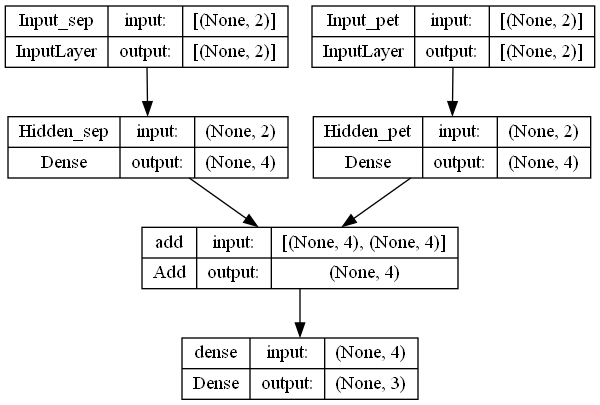

In [14]:
plot_model(model, show_shapes= True)

## 학습 시켜보기!

In [15]:
model.fit([x_train_sep, x_train_pet], y_train,
          epochs = 1000,
          verbose = 1,
          validation_split = 0.15,
          callbacks = [es])

Epoch 1/1000
4/4 [==============================] - 1s 81ms/step - loss: 3.2949 - accuracy: 0.3458 - val_loss: 3.2991 - val_accuracy: 0.3500
Epoch 2/1000
4/4 [==============================] - 0s 16ms/step - loss: 3.2240 - accuracy: 0.3458 - val_loss: 3.2281 - val_accuracy: 0.3500
Epoch 3/1000
4/4 [==============================] - 0s 13ms/step - loss: 3.1501 - accuracy: 0.3458 - val_loss: 3.1596 - val_accuracy: 0.3500
Epoch 4/1000
4/4 [==============================] - 0s 12ms/step - loss: 3.0845 - accuracy: 0.3458 - val_loss: 3.0923 - val_accuracy: 0.3500
Epoch 5/1000
4/4 [==============================] - 0s 13ms/step - loss: 3.0160 - accuracy: 0.3458 - val_loss: 3.0271 - val_accuracy: 0.3500
Epoch 6/1000
4/4 [==============================] - 0s 15ms/step - loss: 2.9512 - accuracy: 0.3458 - val_loss: 2.9638 - val_accuracy: 0.3500
Epoch 7/1000
4/4 [==============================] - 0s 14ms/step - loss: 2.8879 - accuracy: 0.3458 - val_loss: 2.9031 - val_accuracy: 0.3500
Epoch 8/1000


In [16]:
x_test_sep.shape, x_test_pet.shape

((23, 2), (23, 2))

In [17]:
y_pred = model.predict([x_test_sep, x_test_pet])

1/1 [==============================] - 0s 138ms/step


In [18]:
print(y_test[:10])
print(y_pred.round(0)[:10])

[[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]
[[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]
